# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Standard Section 5: Logistic Regression, Multiple Logistic Regression, and KNN-classification

**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner<br/>
**Section Leaders**: Marios Mattheakis, Abhimanyu (Abhi) Vasishth, Robbert (Rob) Struyven<br/>

In this section we will be covering Linear Regression, KNN-Classification, and Logistic Regression on the famous iris dataset.

Specifically, we will: 
    
   1. Import data and data exploration.
   2. Fit a linear regression model for classification, understand drawbacks, and interpret results.
   3. Fit a simple logistic regression model for classification, compare performance, and interpret results.
   4. Visualize Predictions and Decision boundaries.
   5. Fit a higher order polynomial logistic regression model for classification, compare performance, plot decision boundaries, and interpret results.
   6. Fit a higher order polynomial logistic regression model for classification with different regularization parameters C ( [10000, 100, 1] )
   7. Optional: Fit a KNN-classification model for classification, plot decision boundaries, and interpret results.
   8. Optional Homework Tip: Pipeline building to sequentially apply a list of transforms (e.g. scaling, polynomial feature creation) and a final estimator.
   
---------

For this section we will be using the following packages:

In [1]:
# Data and Stats packages
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Visualization packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Aesthetic settings
from IPython.display import display
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)
import warnings
warnings.filterwarnings("ignore")

## 1. Import data and data exploration.

In [2]:
dataset = datasets.load_iris()
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

#### What our the target and features? 

In [3]:
print(dataset.target_names)
print(dataset.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


As we can see, the response variable (y) is the flower type, it has 3 classes: 
- setosa
- versicolor
- virginica

The 4 predictor variables are flower characteristics (x):  
- 'sepal length (cm)'
- 'sepal width (cm)'
- 'petal length (cm)'
- 'petal width (cm)'

In [4]:
X = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
y = pd.DataFrame(data=dataset.target, columns=['species'])
print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


In [5]:
display(X.head())
display(X.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
display(y.head())
display(y.describe())

,species
0,0
1,0
2,0
3,0
4,0


,species
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


## Explore Data 

Check which variables have high correlations and distinctive patterns with the response. 

Any patterns worth mentioning?

In [7]:
full_df = pd.concat([X,y], axis=1)
full_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


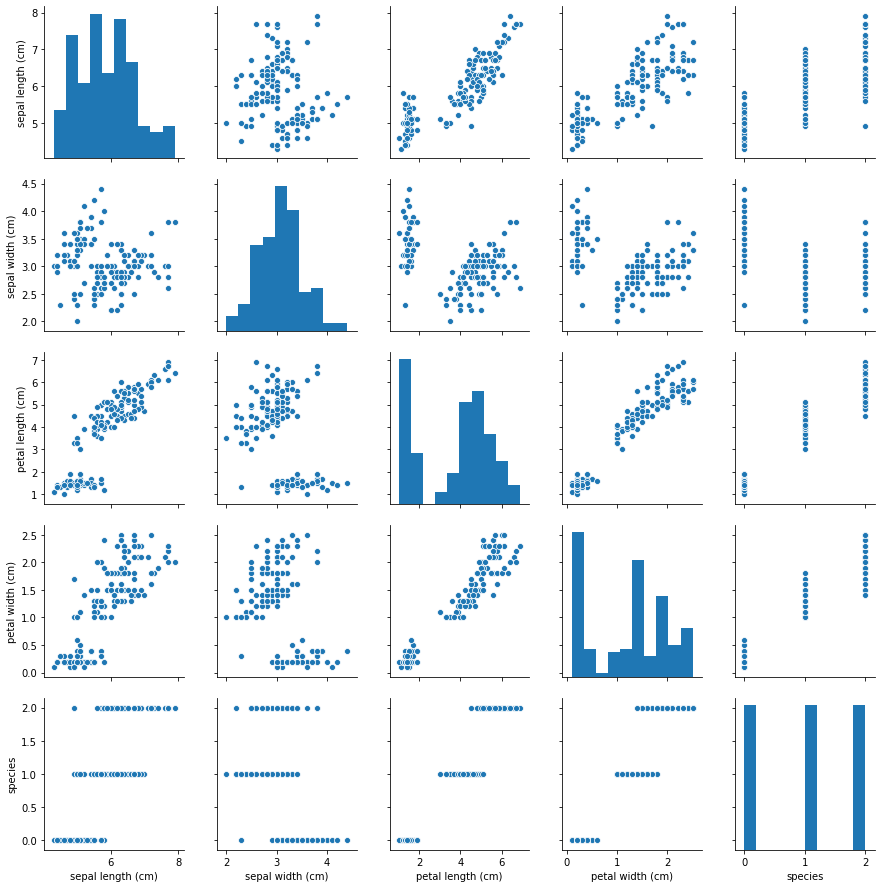

In [8]:
sns.pairplot(full_df)
plt.show()

**Are the features sepal/petal length and width uniformally distributed or do you observe some clusters of data points?**

What do you expect? Let's add color according to our response variable: 'species' = flower species.

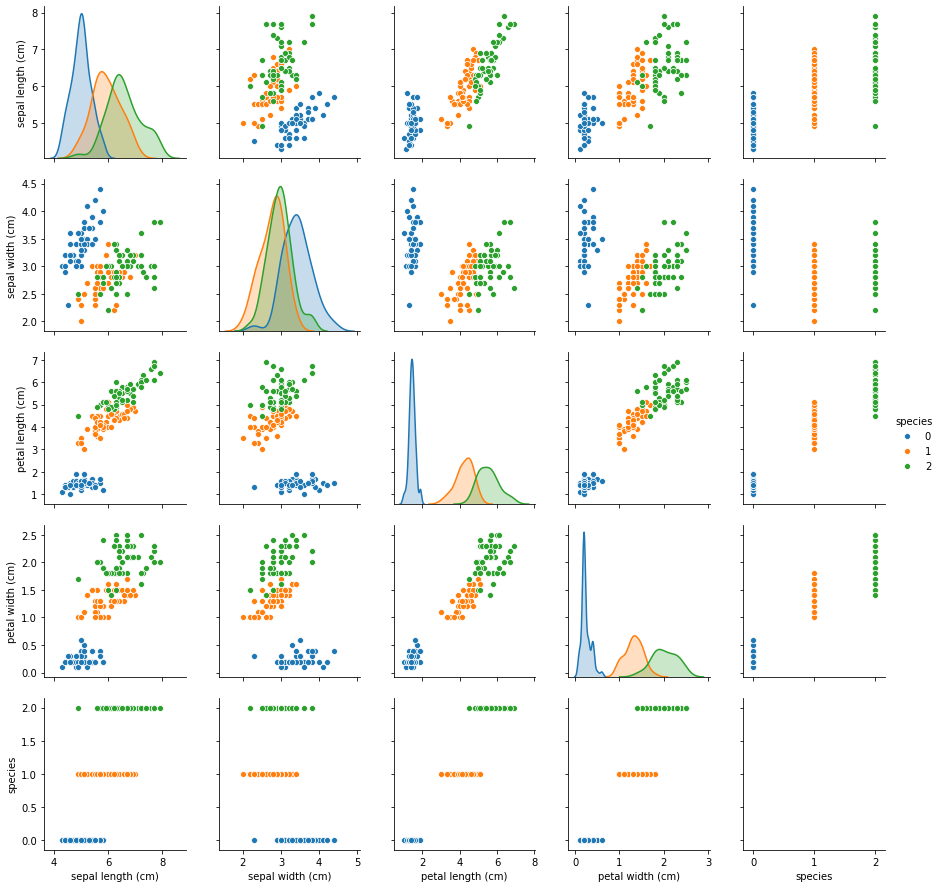

In [9]:
sns.pairplot(full_df, hue='species')
plt.show()

Some features like 'petal length' and 'petal width' do have very high correlations and distinctive patterns with the response variable 'flower species'. When we would use these features for predicting the flower species, the classification wouldn't be very difficult. Certain ranges of 'petal length' and 'petal width' are very much correlated with a specific flower species and they are almost seperating our classes perfectly.

**Just for illustration purposes we will continue to use only 'sepal width (cm)' and 'sepal length (cm)'. We are making the problem harder for ourselves by only using 'weaker' or less-discriminative features.**

In [10]:
X = X[['sepal width (cm)', 'sepal length (cm)']]

### Train-Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(100, 2)
(100, 1)
(50, 2)
(50, 1)


## 2. Fit a linear regression model for classification, understand drawbacks, and interpret results.

In [13]:
model_linear_sklearn = LinearRegression()

#Add constant to x_train and x_test
X_train_cst = sm.add_constant(X_train)
X_test_cst = sm.add_constant(X_test)

#Training
model_linear_sklearn.fit(X_train_cst, y_train)

#Predict
y_pred_train = model_linear_sklearn.predict(X_train_cst)
y_pred_test = model_linear_sklearn.predict(X_test_cst)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

**Why do we get this error? Something is wrong with y_train and y_pred_train...**

In [14]:
y_train[:5]

,species
96,1
105,2
66,1
0,0
122,2


In [15]:
y_pred_train[:5]

array([[1.01761878],
       [2.33100162],
       [0.88117842],
       [0.19897661],
       [2.53139119]])

The fact that our linear regression is outputting continuous predicstions is one of the major drawbacks of linear regression for classification. We can solve this in two manners:
- simply rounding our prediction by using ```np.round())``` and converting it to an int data type with ```.astype(int)```
- or use a modified algorithm that has bounded outputs (more about Logistic Regression later)

In [16]:
np.round(y_pred_train[:5])

array([[1.],
       [2.],
       [1.],
       [0.],
       [3.]])

In [17]:
np.round(y_pred_train[:5]).astype(int)

array([[1],
       [2],
       [1],
       [0],
       [3]])

In [18]:
model_linear_sklearn = LinearRegression()

#Add constant to x_train and x_test
X_train_cst = sm.add_constant(X_train)
X_test_cst = sm.add_constant(X_test)

#Training
model_linear_sklearn.fit(X_train_cst, y_train)

#Predict
y_pred_train = np.round(model_linear_sklearn.predict(X_train_cst)).astype(int)
y_pred_test = np.round(model_linear_sklearn.predict(X_test_cst)).astype(int)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 73.0%
Testing Set Accuracy: 80.0%


### Get Performance by Class (Lookup Confusion Matrix)

- Each row of the matrix represents the instances in an actual class
- Each column represents the instances in a predicted class (or vice versa)
- The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another).

In [19]:
confusion_matrix_linear = pd.crosstab(  y_test.values.flatten(), 
                                        y_pred_test.flatten(), 
                                        rownames=['Actual Class'], 
                                        colnames=['Predicted Class'])
display(confusion_matrix_linear)

Predicted Class,0,1,2,3
Actual Class,,,,
0,19,0,0,0
1,0,10,5,0
2,0,4,11,1


**How many classes do we have in our y_test and in our y_pred_test?**
Why do we have 4 different predicted classes?

**Can we use Linear Regression for classification?**

**Four Assumptions of Linear Regression:**
1. Linearity: Our dependent variable Y is a linear combination of the  explanatory variables X (and the error terms)
2. Observations are independent of one another
3. I.I.D error terms that are Normally Distributed ~ $N(0,\sigma^2)$
4. Design matrix X is Full Rank. 

**Suppose we have a binary outcome variable. Can we use Linear Regression?** 

Then we will have the following problems:
1. The error terms are heteroskedastic
2. $\epsilon$ is not normally distributed because Y takes on only two values
3. The predicted probabilities can be greater than 1 or less than 0

**Datasets where linear regression is problematic:** 
1. Binary response data where there are only two outcomes (yes/no, 0/1, etc.)
2. Categorical or Ordinal Data of any type, where the outcome is one of a number of discrete (possibly ordered) classes
3. Count data in which the outcome is restricted to non-negative integers.
4. Continuous data in which the noise is not normally distributed

**Generalized Linear Models (GLMs), of which Logistic regression is a specific type, to the resque: Logistic regression is most useful for binary response and categorical data.**
 
![Linear versus Logistic](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png)

## 3. Fit a simple logistic regression model for classification, compare performance, plot decision boundaries, and interpret results.

The logistic regression formula: 

$$\hat{p}= \dfrac{e^{w^T x}}{1+e^{w^T x}}$$

This is equivalent to: 

$$\hat{p}= \dfrac{1}{1+e^{-w^T x}}$$

--------

![Sigmoid Function](https://miro.medium.com/max/3000/1*RqXFpiNGwdiKBWyLJc_E7g.png)

[Medium Article: Detailed overview of Logistic Regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)

In [20]:
#Training
model_logistic = LogisticRegression(C=100).fit(X_train_cst, y_train)

#Predict
y_pred_train = model_logistic.predict(X_train_cst)
y_pred_test = model_logistic.predict(X_test_cst)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 80.0%
Testing Set Accuracy: 82.0%


### Let's compare logistic regression against linear regression predictions

- We fix X_train['sepal width (cm)'] to its mean value. 
    - ```x_1 = X_train['sepal width (cm)']````
    - ```x_1_range  = np.ones_like(x_2_range)*x_1.mean()```
- We varie X_train['sepal length (cm)'] from its minimum to its maximum and look how the predicted class evolves.
    - ```x_2 = X_train['sepal length (cm)']```
    - ```x_2_min, x_2_max = x_2.min(), x_2.max()+0.3```
    - ```x_2_range  = np.arange(x_2_min, x_2_max, 0.003)```

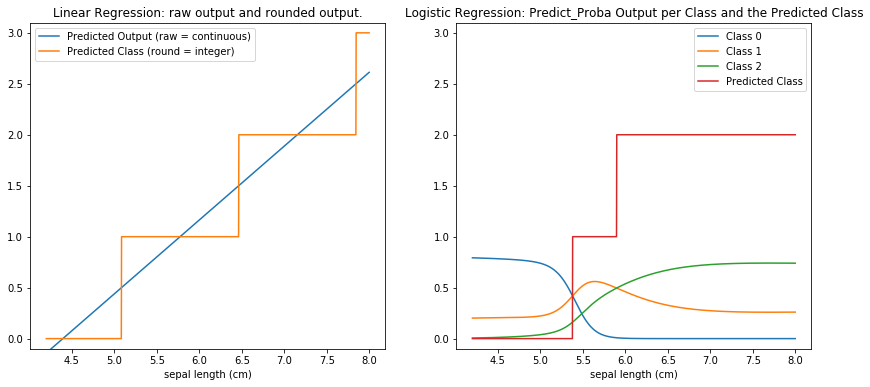

array([[7.92856305e-01, 2.01315765e-01, 5.82792980e-03],
       [7.92781624e-01, 2.01349657e-01, 5.86871930e-03],
       [7.92706706e-01, 2.01383503e-01, 5.90979075e-03],
       ...,
       [7.71649025e-11, 2.59991211e-01, 7.40008789e-01],
       [7.52249807e-11, 2.60012547e-01, 7.39987453e-01],
       [7.33338729e-11, 2.60034035e-01, 7.39965965e-01]])

In [23]:
# Making our input features (x_2 varying, x_1 constat = mean of x_1)
x_1 = X_train['sepal width (cm)']
x_2 = X_train['sepal length (cm)']

x_2_min, x_2_max = x_2.min()-0.1, x_2.max()+0.3

x_2_range  = np.arange(x_2_min, x_2_max, 0.003)
x_constant = np.ones_like(x_2_range)
x_1_range  = np.ones_like(x_2_range)*x_1.mean() 

# Construct our input features
X_with_varying_x_2 = np.stack([x_constant.ravel(),
                               x_1_range.ravel() ,
                               x_2_range.ravel() ], axis = 1)

# Make linear Predictions
prediction_linear = model_linear_sklearn.predict(X_with_varying_x_2)

# Make logistic Predictions
prediction_proba = model_logistic.predict_proba(X_with_varying_x_2)
prediction_thresholded = model_logistic.predict(X_with_varying_x_2)

f,ax = plt.subplots(1,2, figsize=(14,6))
# Plot Linear Predictions
ax[0].plot(x_2_range, prediction_linear, label= 'Predicted Output (raw = continuous)')
ax[0].plot(x_2_range, np.round(prediction_linear), label= 'Predicted Class (round = integer)')
ax[0].legend()
ax[0].set_title('Linear Regression: raw output and rounded output.')
ax[0].set_ylim((-0.1,3.1))
ax[0].set_xlabel('sepal length (cm)')

# Plot Logistic Predictions
ax[1].plot(x_2_range, prediction_proba[:,0], label= 'Class 0')
ax[1].plot(x_2_range, prediction_proba[:,1], label= 'Class 1')
ax[1].plot(x_2_range, prediction_proba[:,2], label= 'Class 2')
ax[1].plot(x_2_range,prediction_thresholded, label= 'Predicted Class')
ax[1].legend()
ax[1].set_title('Logistic Regression: Predict_Proba Output per Class and the Predicted Class')
ax[1].set_xlabel('sepal length (cm)')
ax[1].set_ylim((-0.1,3.1))
plt.show()

prediction_proba

#### How does our Logistic Regression come up with mutiple class predictions?


- Each class $y_i$ has a sigmoid function that tries to predict the probability of the tested input belonging to that specific class $y_i$.
  - In our case when we have 3 classes, thus we have 3 sigmoid functions (the blue, orange and green line in the right figure).


- ```LogisticRegression().predict_proba(...)``` : returns probability estimates $P(y_i|x)$ for each $y_i$. In our case ```.predict_proba(...)``` returns 3 values (one for each class). In the figure we observe that : 
  - we have a **high probability of predicting Class 0** in regions with **low 'sepal length' values (left)**.
  - we have a **high probability of predicting Class 1** in regions with **medium 'sepal length' regions (middle)**.
  - have a **high probability of predicting Class 2** in regions with **high 'sepal length' regions (right)**.
  
  
- ```LogisticRegression().predict(...)```: returns 1 value: the predicted class label. The class with the highest probability given by ```.predict_proba(...)``` is exactly the predicted class output of ```.predict(...)```
  - In the figure our final prediction is the **red line**.

### Get Performance by Class (Lookup Confusion Matrix)

In [ ]:
confusion_matrix_logistic = pd.crosstab(  y_test.values.flatten(), 
                                          y_pred_test.flatten(), 
                                          rownames=['Actual Class'], 
                                          colnames=['Predicted Class'])
display(confusion_matrix_logistic)

Let's compare the confusion matrix of our linear model to the confusion matrix of our logistic regression model: 

In [ ]:
print('######################################')
print('Confusion Matrix Linear Regression:')
display(confusion_matrix_linear)

print('\n######################################')
print('Confusion Matrix Logistic Regression:')
display(confusion_matrix_logistic)
print('######################################')

Now we do observe that the logistic regression has the correct number of predicted classes.

## 4. Visualize Predictions and Decision boundaries.

**What are decision boundaries:**
 - In general, a pattern classifier carves up (or tesselates or partitions) the feature space into volumes called decision regions. 
 - All feature vectors in a decision region are assigned to the same category.

In [ ]:
X_train.head()

In [ ]:
def plot_points(ax):
    for i, y_class in enumerate(set(y_train.values.flatten())):
        index = (y_train == y_class).values
        ax.scatter(X_train[index]['sepal width (cm)'],
                   X_train[index]['sepal length (cm)'],
                   c=colors[i],
                   s=65, 
                   edgecolor='w',
                   label=names[i])

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(6,6))

colors = ["red", "green","blue"]
names = dataset.target_names

plot_points(ax)

ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax.set_title('Classes of Flowers')
ax.set_ylabel('sepal length (cm)')
ax.set_xlabel('sepal width (cm)')
plt.show()

**Plotting the decision boundary:** by using the following functions:
 - ```np.meshgrid(..)```: 'constructing a grid': np.meshgrid() returns coordinate matrices from coordinate vectors.
 - ```plt.contourf(..)```: contourf draws filled contours.

In [ ]:
x_1 = X_train['sepal width (cm)']
x_2 = X_train['sepal length (cm)']

# Just for illustration purposes we use a margin of 0.2 to the
# left, right, top and bottum of our minimal and maximal points.
# This way our minimal and maximal points won't lie exactly 
# on the axis. 

x_1_min, x_1_max = x_1.min() - 0.2, x_1.max() + 0.2
x_2_min, x_2_max = x_2.min() - 0.2, x_2.max() + 0.2

xx_1, xx_2 = np.meshgrid(np.arange(x_1_min, x_1_max, 0.003),
                     np.arange(x_2_min, x_2_max, 0.003))

In [ ]:
# Plotting decision regions
f, ax = plt.subplots(1, 1, figsize=(6, 6))

X_mesh = sm.add_constant(np.stack((xx_1.ravel(), xx_2.ravel()),axis=1))

Z = model_logistic.predict(X_mesh)
Z = Z.reshape(xx_1.shape)

ax.contourf(xx_1, xx_2, Z, alpha=0.5, colors=colors, levels=2)

plot_points(ax)
    
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax.set_title('Classes of Flowers')
ax.set_ylabel('sepal length (cm)')
ax.set_xlabel('sepal width (cm)')
    
plt.show()

**Why are the decision boundaries of this Logistic Regression linear?**

Imagine the simple case where we have only a 2 class classification problem: 
The logistic regression formula can be written as: 

$$\hat{p}= \dfrac{e^{w^T x}}{1+e^{w^T x}}$$

This is equivalent to: 

$$\hat{p}= \dfrac{1}{1+e^{-w^T x}}$$

We have x_1 (sepal width), x_2 (sepal length), and our intercept (constant =1)

$$\hat{p}= \dfrac{1}{1+e^{-(w_0 *1 + w_1 *x_1 +  w_2* x_2)}}$$

Since we don't use multiple higher order polynomial features like $x_1^2, x_2^2$, our logistic model only depends on the first order simple features $x_1$ and $x_2$. 

**What do we have to do to find the the decision boundary?**

The decision boundaries are exactly at the position where our algorithm "hesitates" when predicting which class to classify. The output probability of our sigmoid (or softmax) is exactly 0.5. Solving our sigmoid function for $p=0.5$:

$$\hat{p}= \dfrac{1}{1+e^{-w^T x}} = 0.5 =  \dfrac{1}{1+1} $$

$$ e^{-w^T x} = 1$$

$$ -w^T x = 0$$

$$ w^T x = 0$$

$$ w_0*1 + w_1 *x_1 +  w_2 *1x_2 = 0$$

When we only use two predictor features this constraint of $p=0.5$ results in a linear system; thus we observe a **linear decision boundary.**

In our case when we have three classes.

## 5. Fit a higher order polynomial logistic regression model for classification, compare performance, plot decision boundaries, and interpret results.

In [ ]:
X_train_cst.head()

In [ ]:
X_train_poly_cst=X_train_cst.copy()
X_train_poly_cst['sepal width (cm)^2'] = X_train_cst['sepal width (cm)']**2
X_train_poly_cst['sepal length (cm)^2'] = X_train_cst['sepal length (cm)']**2

X_test_poly_cst=X_test_cst.copy()
X_test_poly_cst['sepal width (cm)^2'] = X_test_poly_cst['sepal width (cm)']**2
X_test_poly_cst['sepal length (cm)^2'] = X_test_poly_cst['sepal length (cm)']**2
X_test_poly_cst.head()

In [ ]:
#Training
model_logistic_poly = LogisticRegression(C=10000).fit(X_train_poly_cst, y_train)

#Predict
y_pred_train = model_logistic_poly.predict(X_train_poly_cst)
y_pred_test = model_logistic_poly.predict(X_test_poly_cst)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

**Our test performance is decreasing, what might be happening?**
 - How would you test if this is happening? 
 - How would you inhibit this phenomenon from happening?

In [ ]:
# Plotting decision regions
f, ax = plt.subplots(1, 1, figsize=(6, 6))

X_mesh_poly = sm.add_constant(np.stack((xx_1.ravel(), xx_2.ravel(), xx_1.ravel()**2,xx_2.ravel()**2),axis=1))

Z = model_logistic_poly.predict(X_mesh_poly)
Z = Z.reshape(xx_1.shape)

ax.contourf(xx_1, xx_2, Z, alpha=0.5, colors=colors, levels=2)

plot_points(ax)
    
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax.set_title('Classes of Flowers')
ax.set_ylabel('sepal length (cm)')
ax.set_xlabel('sepal width (cm)')
    
plt.show()

**What do you observe regarding the form of the decision boundaries? Does this make sense?**

$$\hat{p}= \dfrac{e^{w^T x}}{1+e^{w^T x}}$$

This is equivalent to: 

$$\hat{p}= \dfrac{1}{1+e^{-w^T x}}$$

Now we use $x_1$ (sepal width), $x_2$ (sepal length), an intercept (constant =1), PLUS two higher order terms while making predictions: 
- $x_1^2$ = (sepal_width)^2
- $x_2^2$ = (sepal_length)^2

$$\hat{p}= \dfrac{1}{1+e^{-(w_0 *1 + w_1 *x_1 +  w_2* x_2 + w_3 *x_1^2 +  w_4* x_2^2))}}$$

Now solving for $p=0.5$ results in an equation also dependent on $x_1^2$ and $x_2^2$: thus we observe **non-linear decision boundaries.**

## 6. Fit a higher order polynomial logistic regression model for classification with different regularization parameters C ( [10000, 100, 1] )

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(6*3, 6))

model_logistics =[]
model_logistics_test_accs_scores =[]
model_logistics_train_accs_scores =[]

for test, C in enumerate([10000, 100, 1]):
    model_logistics.append(LogisticRegression(C=C).fit(X_train_poly_cst, y_train))
    
    y_pred_train = model_logistics[test].predict(X_train_poly_cst)
    y_pred_test = model_logistics[test].predict(X_test_poly_cst)
    model_logistics_train_accs_scores.append(accuracy_score(y_train, y_pred_train)*100)
    model_logistics_test_accs_scores.append(accuracy_score(y_test, y_pred_test)*100)

    Z = model_logistics[test].predict(X_mesh_poly)
    Z = Z.reshape(xx_1.shape)

    ax[test].contourf(xx_1, xx_2, Z, alpha=0.5, colors=colors, levels=2)
    plot_points(ax[test])

    ax[test].legend(loc='upper left', ncol=1)
    ax[test].set_title('Classes of Flowers, with C = '+ str(C))
    ax[test].set_ylabel('sepal length (cm)')
    ax[test].set_xlabel('sepal width (cm)')
    
plt.show()

**What do you observe?**
 - How are the decision boundaries looking?
 - What happens when the regularization term C changes? 
 - You may want to look at the documentation of sklearn.linear.LogisticRegression():

In [ ]:
# To get the documentation uncomment and run the following command:
# LogisticRegression?

**What do expect regarding the evolution of the norm of the coefficients of our models when the regularizatoin term C changes?**

Our list contains all 3 models with different values for C (**take a look at the first parameter within brackets**)

In [ ]:
model_logistics

In [ ]:
for test, model in enumerate(model_logistics):
    print('\nRegularization parameter : \tC = {}'.format(model.C))
    print("Training Set Accuracy : \t{}".format(model_logistics_train_accs_scores[test])+'%')
    print("Testing Set Accuracy : \t\t{}".format(model_logistics_test_accs_scores[test])+'%')
    print('Mean absolute coeficient : \t{:0.2f}'.format(np.mean(np.abs(model.coef_))))

**Interpretation of Results: What happens when our Regularization Parameter decreases?**

The amount of regularizaiton increases. This results in:
  - The Training Set Accuracy decreasing a little bit (not much of a problem)
  - The Test Set Accuracy decreasing a little bit (better generalization!)
  - Our size of coefficents decreases on average.


**END OF STANDARD SECTION**

-------

### Optional: Fit a KNN-classification model for classification, plot decision boundaries, and interpret results.

In [ ]:
#Training
model_KNN_classifier = KNeighborsClassifier(n_neighbors=1).fit(X_train_cst, y_train)

In [ ]:
#Predict
y_pred_train = model_KNN_classifier.predict(X_train_cst)
y_pred_test = model_KNN_classifier.predict(X_test_cst)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

The fact we have a big gap of performance between the test and training set means we are overfitting, and can be explained by using "n_neighbors=1".

**Based on your knowledge of KNN-regression can you guess how the decision boundary of the KNN-classification will look when using "n_neighbors=1"?**


In [ ]:
# Plotting decision regions
f, ax = plt.subplots(1, 1, figsize=(6, 6))

Z = model_KNN_classifier.predict(X_mesh)
Z = Z.reshape(xx_1.shape)

ax.contourf(xx_1, xx_2, Z, alpha=0.5, colors=colors, levels=2)

plot_points(ax)
    
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax.set_title('Classes of Flowers')
ax.set_ylabel('sepal length (cm)')
ax.set_xlabel('sepal width (cm)')
plt.show()

### 8. Optional Homework Tip: Pipeline building to sequentially apply a list of transforms (e.g. scaling, polynomial feature creation) and a final estimator.

Instead of manually building our polynomial features which might take a lot of lines of code we can use a **pipeline** to sequentially create polynomials before fitting our logistic regression. Scaling can also be done inside the ```make_pipeline```.

Previously we did: 
```
X_train_poly_cst=X_train_cst.copy()
X_train_poly_cst['sepal width (cm)^2'] = X_train_cst['sepal width (cm)']**2
X_train_poly_cst['sepal length (cm)^2'] = X_train_cst['sepal length (cm)']**2

X_test_poly_cst=X_test_cst.copy()
X_test_poly_cst['sepal width (cm)^2'] = X_test_poly_cst['sepal width (cm)']**2
X_test_poly_cst['sepal length (cm)^2'] = X_test_poly_cst['sepal length (cm)']**2 
```

Now it is a one-liner: 
```
make_pipeline(PolynomialFeatures(degree=2), LogisticRegression())
```

In [ ]:
# your code here
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_logreg_estimator = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LogisticRegression())

#Training
polynomial_logreg_estimator.fit(X_train_poly_cst, y_train)

#Predict
y_pred_train = polynomial_logreg_estimator.predict(X_train_poly_cst)
y_pred_test = polynomial_logreg_estimator.predict(X_test_poly_cst)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

----------------------